
### By-model metrics

```
gpt_model	games	illegal_defeats	avg_legal_moves	illegal_%
o3	32	28	32.5	87.5
o4-mini	35	33	29.5	94.3

```

### By‑model & effort metrics

```
gpt_model	reasoning_effort	games	illegal_defeats	avg_legal_moves	illegal_%
o3	high	3	2	48.3	66.7
o3	low	29	26	30.9	89.7
o4-mini	high	7	7	23.4	100.0
o4-mini	low	24	22	29.3	91.7
o4-mini	medium	4	4	41.5	100.0

```


<Figure size 640x480 with 0 Axes>

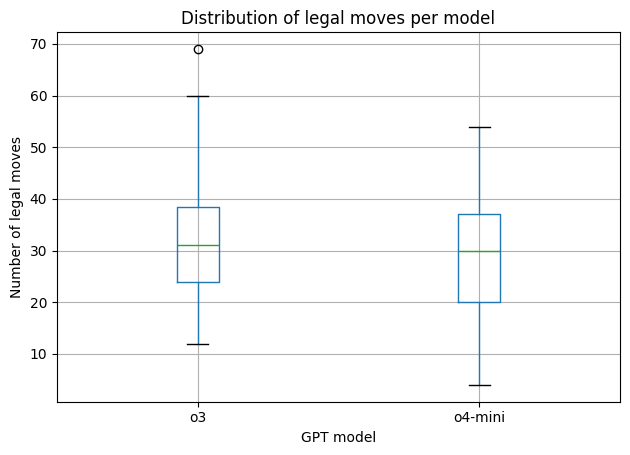

<Figure size 1000x500 with 0 Axes>

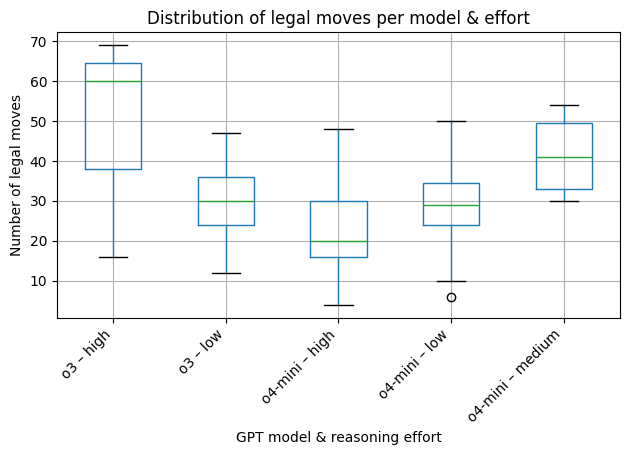

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------------
# Utility: self‑contained markdown display
def show_df_markdown(df, title):
    """
    Print a DataFrame as a markdown table, avoiding external helpers.
    """
    print(f"\n### {title}\n")
    try:
        # pandas 1.5+ supports to_markdown (requires tabulate, usually present)
        md = df.to_markdown(index=False)
        print(md)
    except Exception:
        # Fallback: simple TSV inside code block
        tsv = df.to_csv(sep='\t', index=False)
        print("```\n" + tsv + "\n```")

# Load data
file_path = 'games_analysis.csv'
df = pd.read_csv(file_path)

# ---------------------------------------------------------------------------
# Aggregation by GPT model
agg_model = (
    df.groupby('gpt_model')
      .agg(
          games=('gpt_model', 'size'),
          illegal_defeats=('illegal move', lambda x: (x.str.lower() == 'yes').sum()),
          avg_legal_moves=('number of moves played', 'mean')
      )
      .reset_index()
)
agg_model['illegal_%'] = (agg_model['illegal_defeats'] / agg_model['games'] * 100).round(1)
agg_model['avg_legal_moves'] = agg_model['avg_legal_moves'].round(1)

# display_dataframe_to_user("By‑model metrics", agg_model)
show_df_markdown(agg_model, "By-model metrics")

# ---------------------------------------------------------------------------
# Aggregation by GPT model + reasoning effort
agg_model_effort = (
    df.groupby(['gpt_model', 'reasoning_effort'])
      .agg(
          games=('gpt_model', 'size'),
          illegal_defeats=('illegal move', lambda x: (x.str.lower() == 'yes').sum()),
          avg_legal_moves=('number of moves played', 'mean')
      )
      .reset_index()
)
agg_model_effort['illegal_%'] = (agg_model_effort['illegal_defeats'] / agg_model_effort['games'] * 100).round(1)
agg_model_effort['avg_legal_moves'] = agg_model_effort['avg_legal_moves'].round(1)



        
show_df_markdown(agg_model_effort, "By‑model & effort metrics")

# ---------------------------------------------------------------------------
# Bar chart: average legal moves per GPT model
#plt.figure()
#plt.bar(agg_model['gpt_model'], agg_model['avg_legal_moves'])
#plt.xlabel('GPT model')
#plt.ylabel('Average legal moves')
#plt.title('Avg legal moves per model')
#plt.grid(True, axis='y')
#plt.tight_layout()
#plt.show()

# ---------------------------------------------------------------------------
# Bar chart: average legal moves per GPT model + reasoning effort
#plt.figure(figsize=(8,4))
#labels = agg_model_effort.apply(lambda r: f"{r['gpt_model']} – {r['reasoning_effort']}", axis=1)
#plt.bar(labels, agg_model_effort['avg_legal_moves'])
#plt.xticks(rotation=45, ha='right')
#plt.ylabel('Average legal moves')
#plt.title('Avg legal moves per model & effort')
#plt.grid(True, axis='y')
#plt.tight_layout()
#plt.show()


file_path = 'games_analysis.csv'
df = pd.read_csv(file_path)

# Combine model and reasoning effort into a single label
df['model_effort'] = df['gpt_model'].astype(str) + ' – ' + df['reasoning_effort'].astype(str)

# ---------------------------------------------------------------------------
# Box plot: distribution of legal moves by GPT model
plt.figure()
df.boxplot(column='number of moves played', by='gpt_model')
plt.suptitle('')
plt.xlabel('GPT model')
plt.ylabel('Number of legal moves')
plt.title('Distribution of legal moves per model')
plt.tight_layout()
plt.show()

# Create the boxplot
plt.figure(figsize=(10, 5))
df.boxplot(column='number of moves played', by='model_effort', grid=True)

plt.suptitle('')  # Remove automatic suptitle
plt.xlabel('GPT model & reasoning effort')
plt.ylabel('Number of legal moves')
plt.title('Distribution of legal moves per model & effort')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("gpt_reasoning_boxplots_legalmoves.png")
plt.show()


In [15]:
# Load data
file_path = 'games_analysis.csv'
df = pd.read_csv(file_path)
# 1. Compute counts
counts = df['illegal_move_detail'].value_counts()

# 2. Turn into a DataFrame with named columns
counts_df = (
    counts
    .rename_axis('illegal_move_detail')   # name the index
    .reset_index(name='count')            # make it a column
)

counts_df

,illegal_move_detail,count
0,dxc6,3
1,hxg4,2
2,Bxc4,2
3,Nxd4,2
4,Ne4,2
5,Na4,2
6,Nd4,2
7,Ng5,1
8,exd6 e.p.,1
9,f4,1
